In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load your dataset
df = pd.read_csv('Pharmaceutical Drug Spending by countries.csv')
df

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
0,AUS,1971,15.992,0.727,35.720,NaN,462.11
1,AUS,1972,15.091,0.686,36.056,NaN,475.11
2,AUS,1973,15.117,0.681,39.871,NaN,533.47
3,AUS,1974,14.771,0.755,47.559,NaN,652.65
4,AUS,1975,11.849,0.682,47.561,NaN,660.76
...,...,...,...,...,...,...,...
1031,USA,2011,11.855,1.939,965.580,NaN,300935.91
1032,USA,2012,11.459,1.874,964.237,NaN,302768.85
1033,USA,2013,11.384,1.858,980.864,NaN,310154.01
1034,USA,2014,11.968,1.981,1081.402,NaN,344495.16


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     1036 non-null   object 
 1   TIME         1036 non-null   int64  
 2   PC_HEALTHXP  1036 non-null   float64
 3   PC_GDP       1036 non-null   float64
 4   USD_CAP      1036 non-null   float64
 5   FLAG_CODES   63 non-null     object 
 6   TOTAL_SPEND  1036 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 56.8+ KB


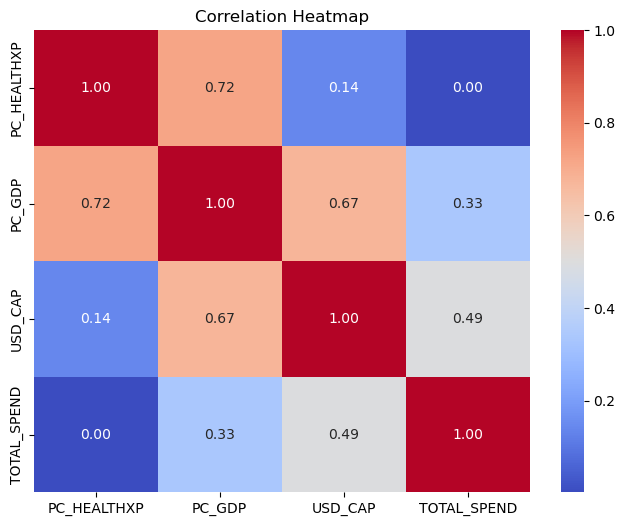

In [5]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df[['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

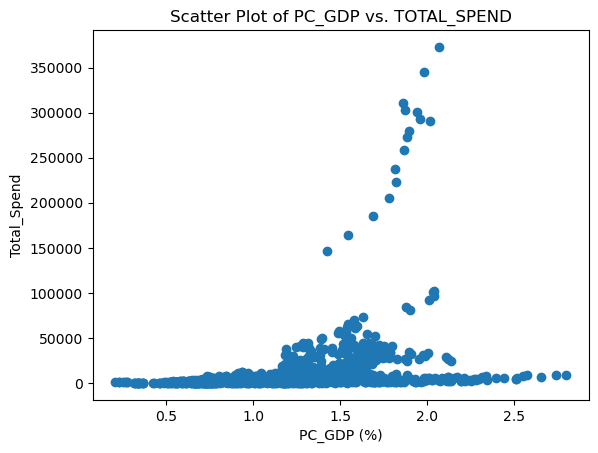

In [6]:
# Plot PC_GDP vs. TOTAL_SPEND
plt.scatter(x='PC_GDP', y='TOTAL_SPEND', data=df)

# Add labels and legend
plt.xlabel('PC_GDP (%)')
plt.ylabel('Total_Spend')
plt.title('Scatter Plot of PC_GDP vs. TOTAL_SPEND')
plt.show()

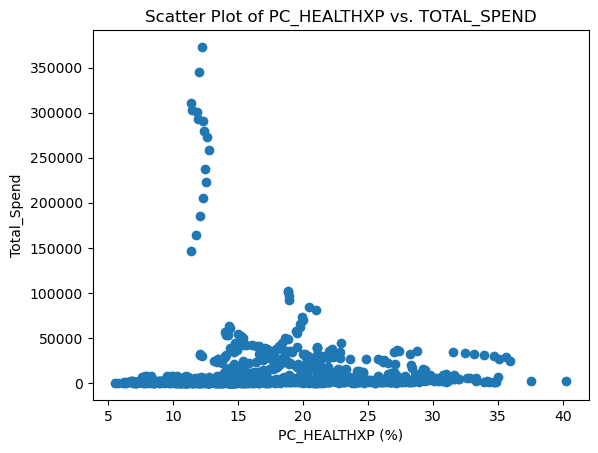

In [7]:
# Plot PC_HEALTHXP vs. TOTAL_SPEND
plt.scatter(x='PC_HEALTHXP', y='TOTAL_SPEND', data=df)

# Add labels and legend
plt.xlabel('PC_HEALTHXP (%)')
plt.ylabel('Total_Spend')
plt.title('Scatter Plot of PC_HEALTHXP vs. TOTAL_SPEND')
plt.show()

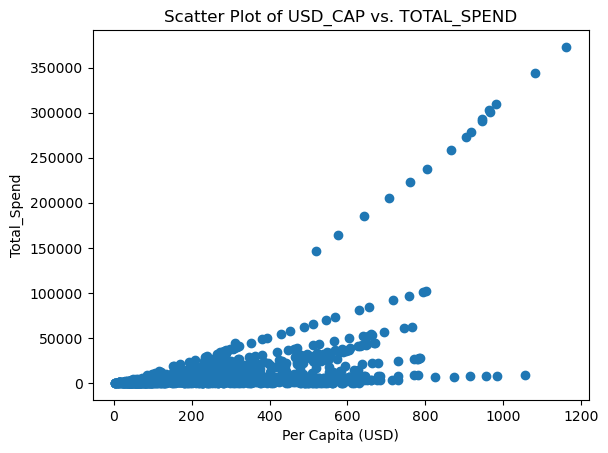

In [8]:
# Plot USD_CAP vs. TOTAL_SPEND
plt.scatter(x='USD_CAP', y='TOTAL_SPEND', data=df)

# Add labels and legend
plt.xlabel('Per Capita (USD)')
plt.ylabel('Total_Spend')
plt.title('Scatter Plot of USD_CAP vs. TOTAL_SPEND')
plt.show()

In [16]:
df_train, df_test = train_test_split(
    df, train_size=0.75, random_state=42
)

In [17]:
df_train.shape

(777, 7)

In [18]:
df_test.shape

(259, 7)

In [21]:
import math

def rmspe(y_true, y_pred):
    """
    Calculate Root Mean Squared Prediction Error (RMSPE) # or also called RMSE: Root Mean Squared Error
    
    Parameters:
    y_true: list-like, actual values
    y_pred: list-like, predicted values
    
    Returns:
    float: RMSPE value
    """
    n = len(y_true)
    squared_errors = []

    for i in range(n):
        error = y_true[i] - y_pred[i]
        squared_errors.append(error ** 2)

    mean_squared_error = sum(squared_errors) / n

    # Calculate the square root of the mean squared error
    rmspe_value = math.sqrt(mean_squared_error)
    
    return rmspe_value

In [19]:
# Step 1: Define features and target variable
X_train = df_train[['PC_HEALTHXP', 'PC_GDP', 'USD_CAP']]
y_train = df_train['TOTAL_SPEND']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [22]:
# Step 2: Initialize K-NN regressor
knn_regressor = KNeighborsRegressor()

# Step 3: Define parameter grid for GridSearchCV
param_grid = {
    "n_neighbors": range(1, 201, 3),        # But wait...? What is this?
}

# Step 4: Initialize and fit GridSearchCV
df_gridsearch = GridSearchCV(
    estimator=knn_regressor,
    param_grid=param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error"
)

df_gridsearch.fit(X_train, y_train)

# Step 5: Retrieve and format results
results = pd.DataFrame(df_gridsearch.cv_results_)     # After fitting the model, we extract the cross-validation results using `cv_results_`. This output includes various metrics and parameters tested during the cross-validation process.
results = (
    results[[
        "param_n_neighbors",
        "mean_test_score"
    ]]
    .rename(columns={"param_n_neighbors": "n_neighbors"})
) # we specify the scoring metric as "neg_root_mean_squared_error" to evaluate the model performance based on RMSPE.

print(results)

    n_neighbors  mean_test_score
0             1    -39916.983044
1             4    -27261.717192
2             7    -28251.735969
3            10    -27114.287305
4            13    -27528.820733
..          ...              ...
62          187    -33889.835069
63          190    -33932.029749
64          193    -33982.282684
65          196    -34022.425237
66          199    -34062.588759

[67 rows x 2 columns]


In [23]:
results["mean_test_score"] = -results["mean_test_score"]
results

,n_neighbors,mean_test_score
0,1,39916.983044
1,4,27261.717192
2,7,28251.735969
3,10,27114.287305
4,13,27528.820733
...,...,...
62,187,33889.835069
63,190,33932.029749
64,193,33982.282684
65,196,34022.425237


In [24]:
results.nsmallest(1, 'mean_test_score')

,n_neighbors,mean_test_score
3,10,27114.287305


In [25]:
df_gridsearch.best_params_

{'n_neighbors': 10}

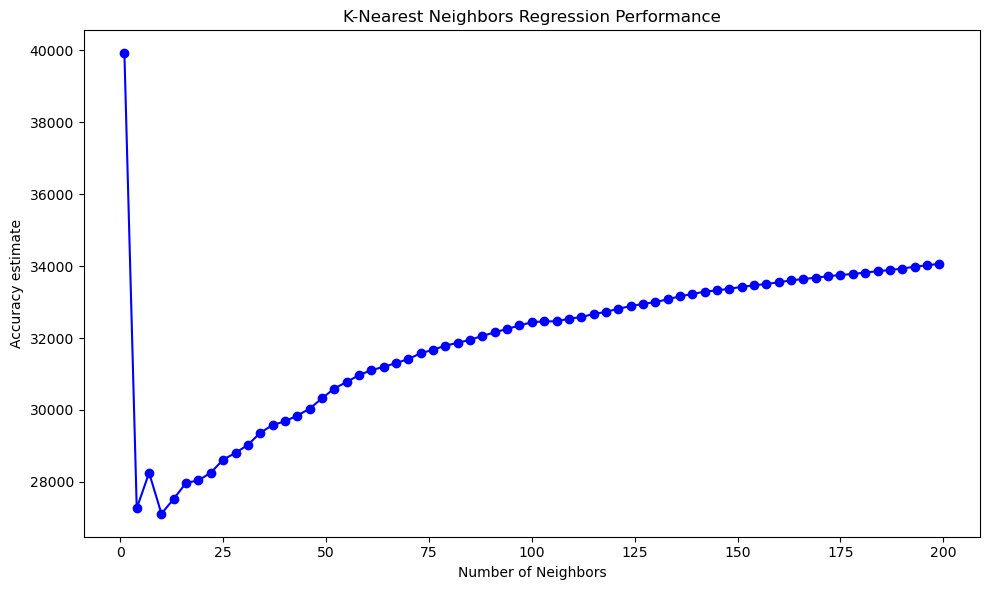

In [26]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(results['n_neighbors'], results['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy estimate')
plt.title('K-Nearest Neighbors Regression Performance')
plt.tight_layout()
plt.show()

In [29]:
# Make predictions on the test set
df_test['predicted'] = df_gridsearch.predict(df_test[['PC_HEALTHXP', 'PC_GDP', 'USD_CAP']])

# Calculate RMSPE
rmspe = mean_squared_error(
    y_true=df_test["TOTAL_SPEND"],
    y_pred=df_test["predicted"]
)**0.5

rmspe

0.0

In [32]:
# Define features and target variable
X = df[['USD_CAP']]
y = df['TOTAL_SPEND']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [40]:
X_train.shape

(725, 1)

In [41]:
X_test.shape

(311, 1)

In [33]:
# Step 2: Initialize K-NN regressor
knn_regressor = KNeighborsRegressor()

# Step 3: Define parameter grid for GridSearchCV
param_grid = {
    "n_neighbors": range(1, 201, 3),        # But wait...? What is this?
}

# Step 4: Initialize and fit GridSearchCV
df_gridsearch = GridSearchCV(
    estimator=knn_regressor,
    param_grid=param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error"
)

df_gridsearch.fit(X_train, y_train)

# Step 5: Retrieve and format results
results = pd.DataFrame(df_gridsearch.cv_results_)     # After fitting the model, we extract the cross-validation results using `cv_results_`. This output includes various metrics and parameters tested during the cross-validation process.
results = (
    results[[
        "param_n_neighbors",
        "mean_test_score"
    ]]
    .rename(columns={"param_n_neighbors": "n_neighbors"})
) # we specify the scoring metric as "neg_root_mean_squared_error" to evaluate the model performance based on RMSPE.

print(results)

    n_neighbors  mean_test_score
0             1    -39882.947706
1             4    -28013.005279
2             7    -29424.639133
3            10    -28457.741436
4            13    -28805.773188
..          ...              ...
62          187    -32836.594989
63          190    -32858.040309
64          193    -32902.963937
65          196    -32931.979574
66          199    -32958.428494

[67 rows x 2 columns]


In [34]:
results["mean_test_score"] = -results["mean_test_score"]
results

,n_neighbors,mean_test_score
0,1,39882.947706
1,4,28013.005279
2,7,29424.639133
3,10,28457.741436
4,13,28805.773188
...,...,...
62,187,32836.594989
63,190,32858.040309
64,193,32902.963937
65,196,32931.979574


In [35]:
results.nsmallest(1, 'mean_test_score')

,n_neighbors,mean_test_score
1,4,28013.005279


In [36]:
df_gridsearch.best_params_

{'n_neighbors': 4}

In [37]:
# Make predictions on the test set
df_test['predicted'] = df_gridsearch.predict(df_test[['USD_CAP']])

# Calculate RMSPE
rmspe = mean_squared_error(
    y_true=df_test["TOTAL_SPEND"],
    y_pred=df_test["predicted"]
)**0.5

rmspe

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


174420.5743900692

Using Adrienne's code to find the countries with the most amount of data points

/var/folders/vk/7f5v13993c58cswjwb8_rwvm0000gq/T/ipykernel_84611/2294791767.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table = pivot_table.applymap(lambda x: 1 if x > 0 else 0)


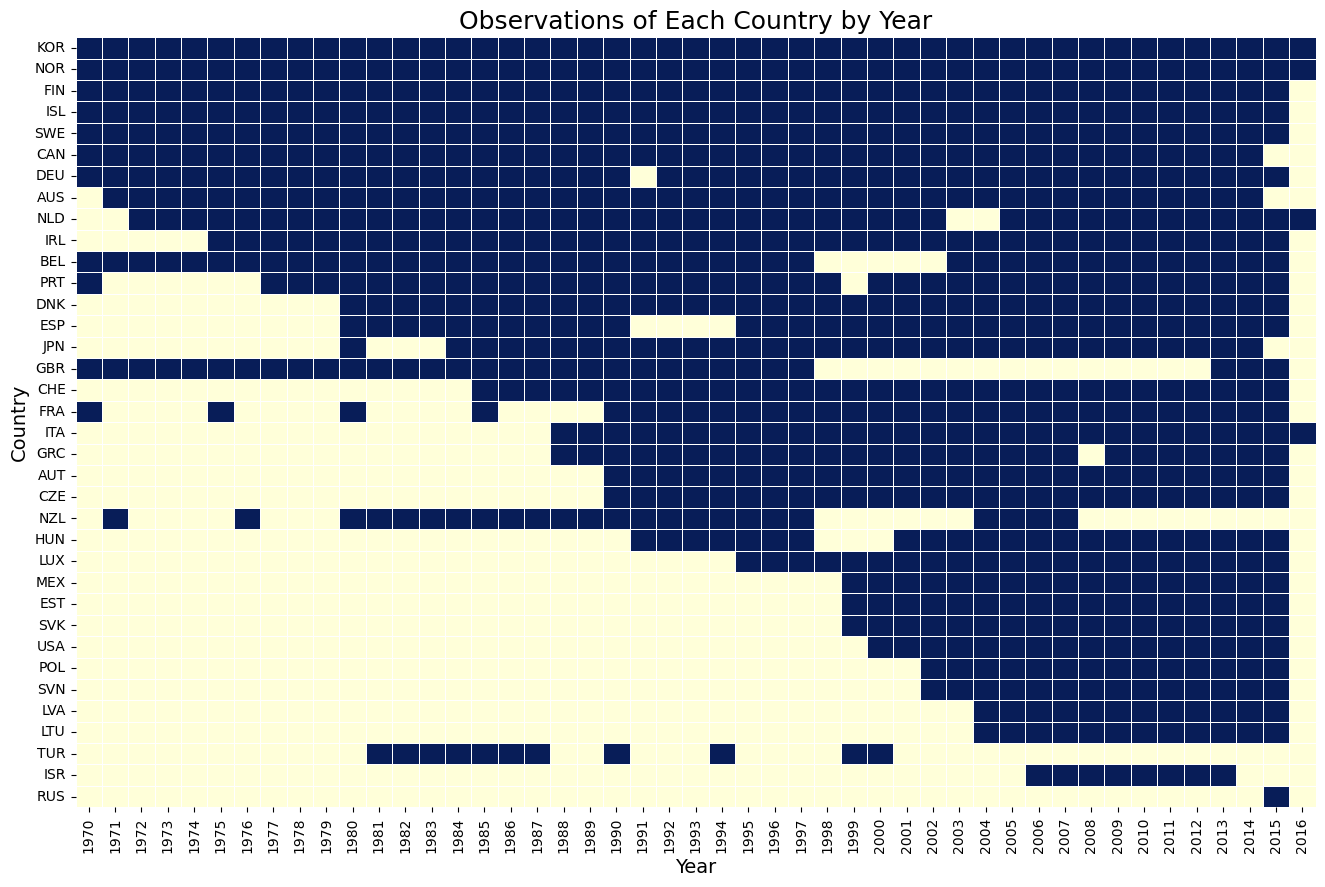

In [5]:
# Create a pivot table with countries as rows and years as columns
pivot_table = df.pivot_table(index='LOCATION', columns='TIME', aggfunc='size', fill_value=0)

# Convert the pivot table to a binary format (presence or absence of observation)
pivot_table = pivot_table.applymap(lambda x: 1 if x > 0 else 0)

# Count the number of observations per country
observation_counts = pivot_table.sum(axis=1)

# Sort the countries by the number of observations
sorted_countries = observation_counts.sort_values(ascending=False).index

# Reorder the pivot table based on the sorted countries
pivot_table_sorted = pivot_table.loc[sorted_countries]

# Plot the heatmap
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(pivot_table_sorted, cmap="YlGnBu", cbar=False, linewidths=.5)

# Add labels and title
heatmap.set_xlabel('Year', fontsize=14)
heatmap.set_ylabel('Country', fontsize=14)
heatmap.set_title('Observations of Each Country by Year', fontsize=18)

# Display the heatmap
plt.show()

Linear Regression with 7 countries with the most data from 1970-2015, no imputation

In [6]:
# Creating new database with the top 7 countries with the most years of data (1970-2015), no imputation
pivot_table_allyears = pivot_table_sorted.iloc[:7].index
df_all_years1 = df[
    (df["LOCATION"].isin(pivot_table_allyears)) & 
    (df["TIME"] >= 1970) & 
    (df["TIME"] <= 2015)
]
df_all_years1

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
111,CAN,1970,11.962,0.760,34.512,NaN,735.93
112,CAN,1971,11.529,0.762,37.493,NaN,811.56
113,CAN,1972,10.962,0.716,38.279,NaN,841.89
114,CAN,1973,10.942,0.679,40.480,NaN,905.51
115,CAN,1974,10.026,0.611,40.559,NaN,923.69
...,...,...,...,...,...,...,...
1004,SWE,2011,10.245,1.094,478.705,NaN,4523.39
1005,SWE,2012,10.149,1.110,496.505,NaN,4726.42
1006,SWE,2013,9.846,1.093,499.194,NaN,4792.45
1007,SWE,2014,9.816,1.094,507.491,NaN,4920.69


USD_CAP vs Time

Optimal n_neighbors: 1
The RMSPE for CAN is: 24.5062
R^2 score: 0.9932866614075403


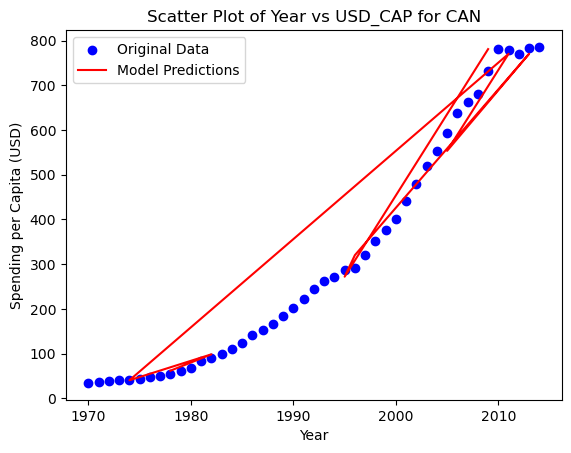

Optimal n_neighbors: 3
The RMSPE for DEU is: 23.1228
R^2 score: 0.9910653359940751


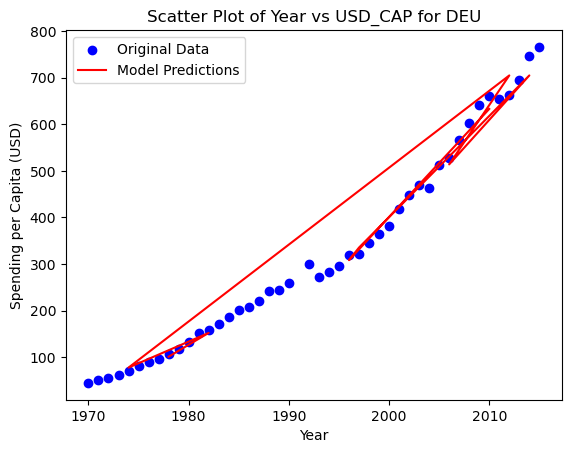

Optimal n_neighbors: 2
The RMSPE for FIN is: 7.4669
R^2 score: 0.9983879506066563


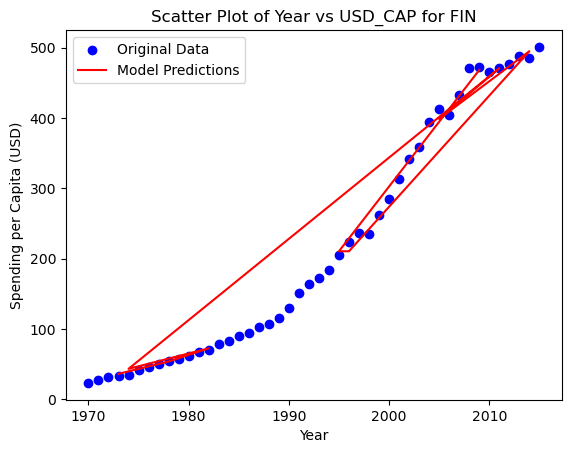

Optimal n_neighbors: 3
The RMSPE for ISL is: 22.8888
R^2 score: 0.9870095129162407


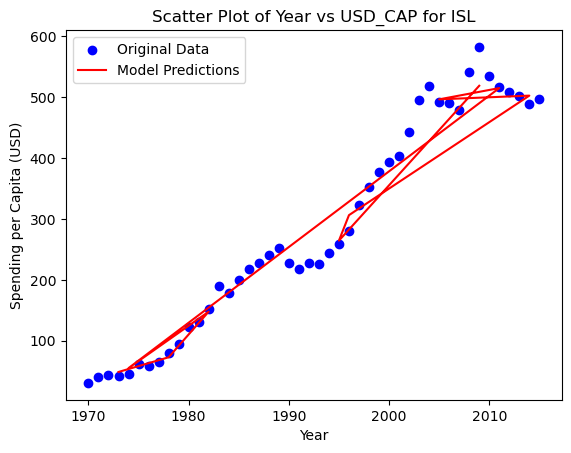

Optimal n_neighbors: 1
The RMSPE for KOR is: 19.0563
R^2 score: 0.9924501534164476


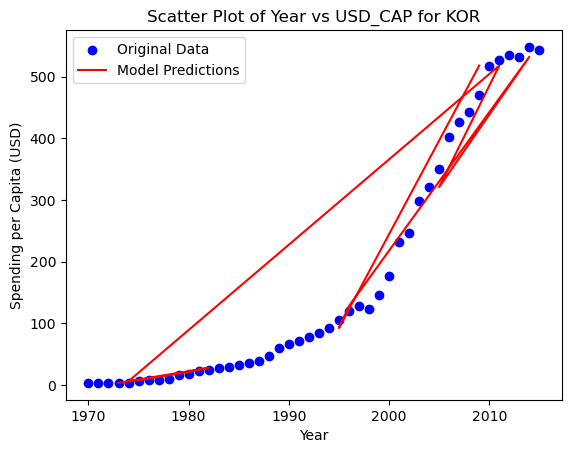

Optimal n_neighbors: 2
The RMSPE for NOR is: 8.3998
R^2 score: 0.9976810191301105


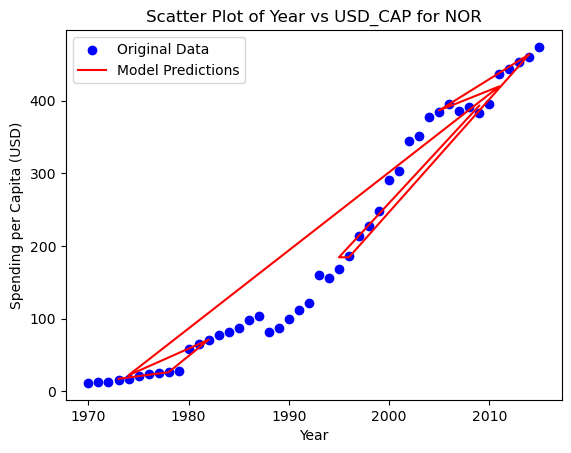

Optimal n_neighbors: 3
The RMSPE for SWE is: 13.4842
R^2 score: 0.9948605848926624


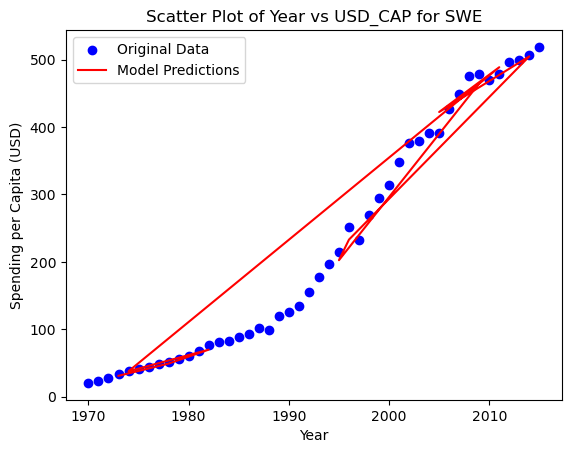

In [15]:
def KNN(country):
    country_name = country.LOCATION.unique()[0]

    # Split the dataset into training and testing sets
    country_train, country_test = train_test_split(country, train_size=0.8, random_state=42)

    # Define the parameter grid for n_neighbors
    param_grid = {'n_neighbors': list(range(1, 21))}

    # Instantiate and fit the KNN model
    knn = KNeighborsRegressor()

   # Perform grid search with cross-validation
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(country_train[['TIME']], country_train['USD_CAP'])

    # Print the cross-validation results
    #print("Cross-validation results:")
    #cv_results = grid_search.cv_results_
    #for mean_score, std_score, params in zip(cv_results["mean_test_score"], cv_results["std_test_score"], cv_results["params"]):
    #    print(f"n_neighbors={params['n_neighbors']} - Mean Score: {mean_score:.4f}, Std Score: {std_score:.4f}")

    # Get the best number of neighbors
    best_n_neighbors = grid_search.best_params_['n_neighbors']
    print(f"Optimal n_neighbors: {best_n_neighbors}")

    # Use the best n_neighbors to fit the model
    knn_best = KNeighborsRegressor(n_neighbors=best_n_neighbors)
    knn_best.fit(country_train[['TIME']], country_train['USD_CAP'])

    # Make predictions
    country_test["predicted"] = knn_best.predict(country_test[["TIME"]])

    # Calculate RMSPE
    RMSPE = mean_squared_error(y_true=country_test['USD_CAP'], y_pred=country_test['predicted'])**0.5
    print(f"The RMSPE for {country_name} is: {RMSPE:.4f}")

    # Calculate R^2 score
    r2 = r2_score(country_test["USD_CAP"], country_test["predicted"])
    print(f"R^2 score: {r2}")

    # Plot the model predictions as a line
    plt.scatter(country['TIME'], country['USD_CAP'], label='Original Data', color='blue')
    plt.plot(country_test['TIME'], country_test['predicted'], color='red', label='Model Predictions')

    # Add labels and legend
    plt.xlabel('Year')
    plt.ylabel('Spending per Capita (USD)')
    plt.title(f'Scatter Plot of Year vs USD_CAP for {country_name}')
    plt.legend()

    # Show the plot
    plt.show()

# Applying the function to each country in df_all_years
for country_name, country_group in df_all_years1.groupby("LOCATION"):
    KNN(country_group)


PC_GDP vs Time

Optimal n_neighbors: 1
The RMSPE for CAN is: 0.0439
R^2 score: 0.9927511586279972


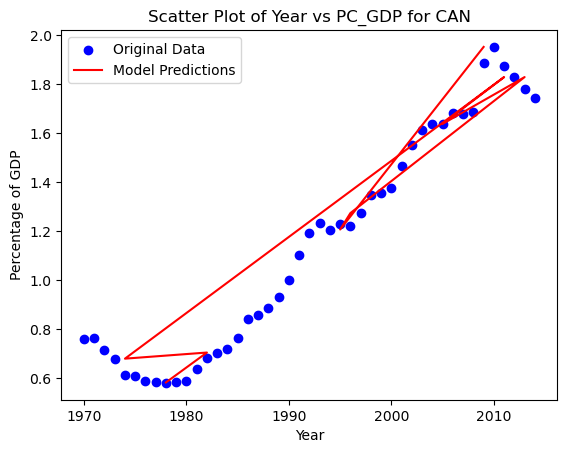

Optimal n_neighbors: 6
The RMSPE for DEU is: 0.0382
R^2 score: 0.964013361376104


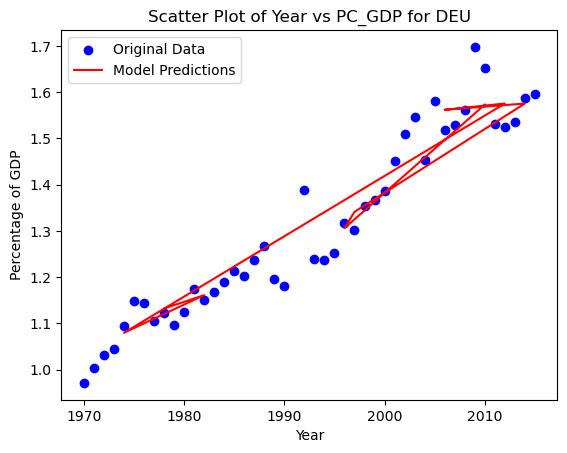

Optimal n_neighbors: 2
The RMSPE for FIN is: 0.0440
R^2 score: 0.9658305607132678


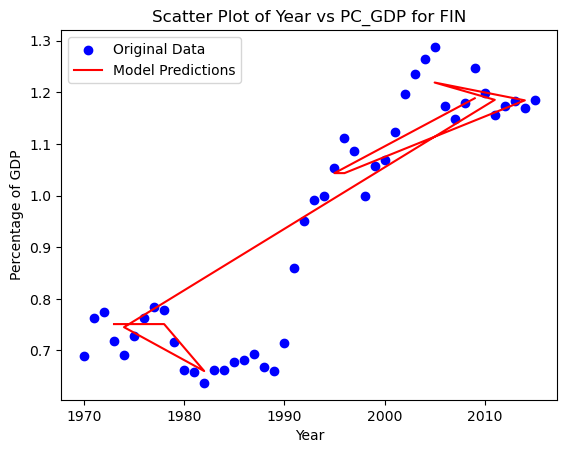

Optimal n_neighbors: 3
The RMSPE for ISL is: 0.0811
R^2 score: 0.879822407334253


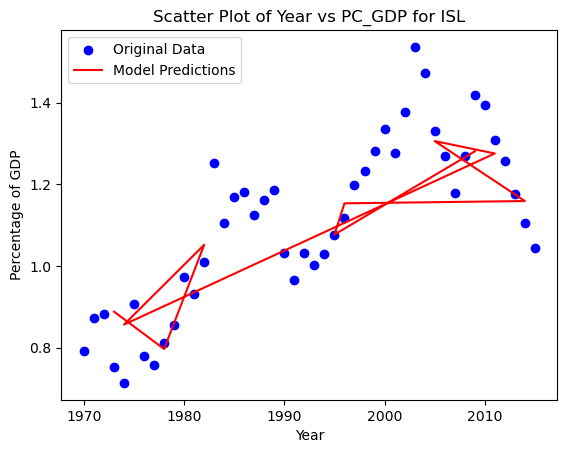

Optimal n_neighbors: 3
The RMSPE for KOR is: 0.0652
R^2 score: 0.9844209049818066


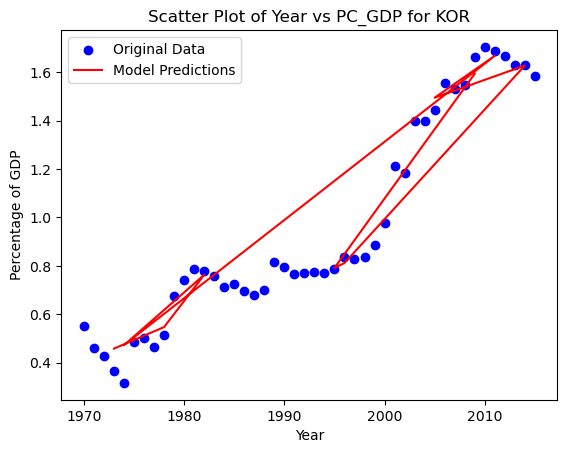

Optimal n_neighbors: 4
The RMSPE for NOR is: 0.0331
R^2 score: 0.9621147985099898


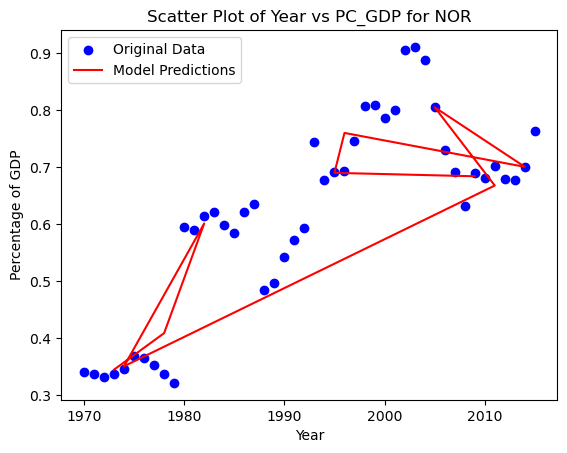

Optimal n_neighbors: 4
The RMSPE for SWE is: 0.0484
R^2 score: 0.966253004304505


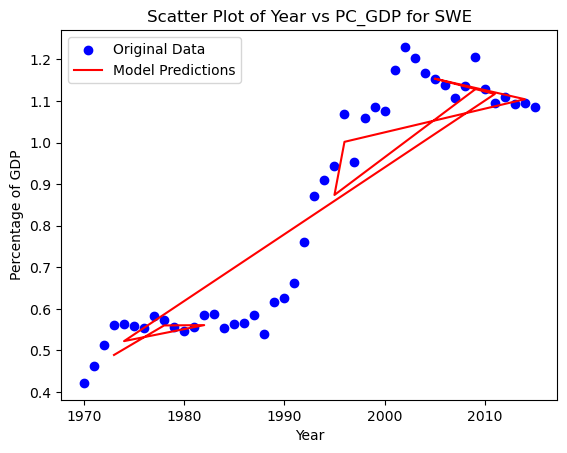

In [16]:
def KNN(country):
    country_name = country.LOCATION.unique()[0]

    # Split the dataset into training and testing sets
    country_train, country_test = train_test_split(country, train_size=0.8, random_state=42)

    # Define the parameter grid for n_neighbors
    param_grid = {'n_neighbors': list(range(1, 21))}

    # Instantiate and fit the KNN model
    knn = KNeighborsRegressor()

   # Perform grid search with cross-validation
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(country_train[['TIME']], country_train['PC_GDP'])

    # Print the cross-validation results
    #print("Cross-validation results:")
    #cv_results = grid_search.cv_results_
    #for mean_score, std_score, params in zip(cv_results["mean_test_score"], cv_results["std_test_score"], cv_results["params"]):
    #    print(f"n_neighbors={params['n_neighbors']} - Mean Score: {mean_score:.4f}, Std Score: {std_score:.4f}")

    # Get the best number of neighbors
    best_n_neighbors = grid_search.best_params_['n_neighbors']
    print(f"Optimal n_neighbors: {best_n_neighbors}")

    # Use the best n_neighbors to fit the model
    knn_best = KNeighborsRegressor(n_neighbors=best_n_neighbors)
    knn_best.fit(country_train[['TIME']], country_train['PC_GDP'])

    # Make predictions
    country_test["predicted"] = knn_best.predict(country_test[["TIME"]])

    # Calculate RMSPE
    RMSPE = mean_squared_error(y_true=country_test['PC_GDP'], y_pred=country_test['predicted'])**0.5
    print(f"The RMSPE for {country_name} is: {RMSPE:.4f}")

    # Calculate R^2 score
    r2 = r2_score(country_test["PC_GDP"], country_test["predicted"])
    print(f"R^2 score: {r2}")

    # Plot the model predictions as a line
    plt.scatter(country['TIME'], country['PC_GDP'], label='Original Data', color='blue')
    plt.plot(country_test['TIME'], country_test['predicted'], color='red', label='Model Predictions')

    # Add labels and legend
    plt.xlabel('Year')
    plt.ylabel('Percentage of GDP')
    plt.title(f'Scatter Plot of Year vs PC_GDP for {country_name}')
    plt.legend()

    # Show the plot
    plt.show()

# Applying the function to each country in df_all_years
for country_name, country_group in df_all_years1.groupby("LOCATION"):
    KNN(country_group)


PC_GDP vs US_CAP

Optimal n_neighbors: 2
The RMSPE for CAN is: 0.0395
R^2 score: 0.9941405303365829


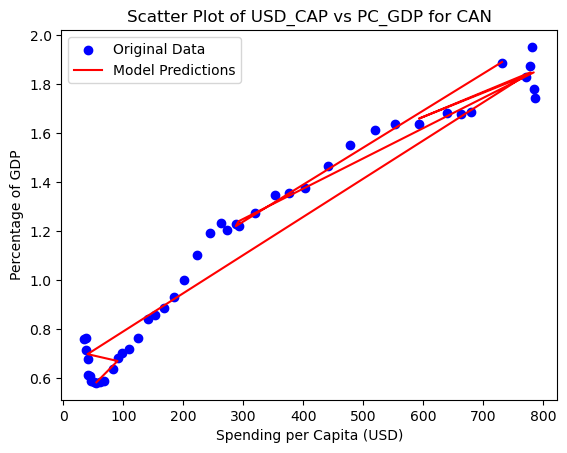

Optimal n_neighbors: 4
The RMSPE for DEU is: 0.0311
R^2 score: 0.9760988025923911


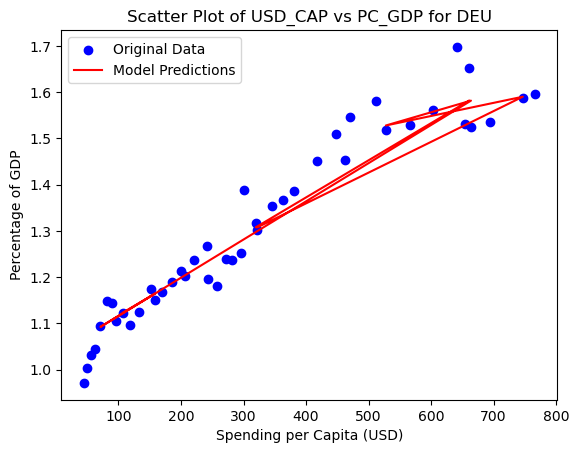

Optimal n_neighbors: 2
The RMSPE for FIN is: 0.0510
R^2 score: 0.9540077235821915


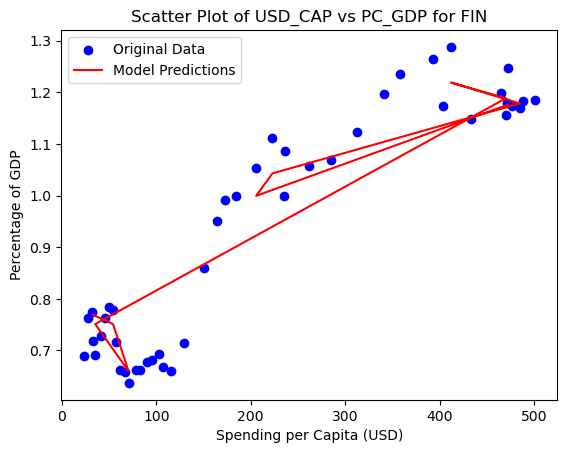

Optimal n_neighbors: 7
The RMSPE for ISL is: 0.0834
R^2 score: 0.8729665411127178


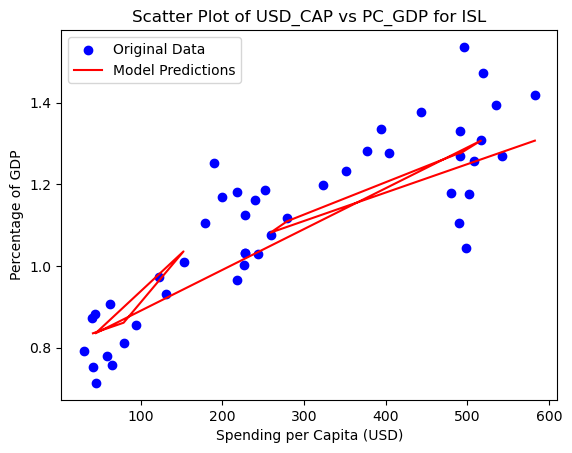

Optimal n_neighbors: 1
The RMSPE for KOR is: 0.1065
R^2 score: 0.9585007781149854


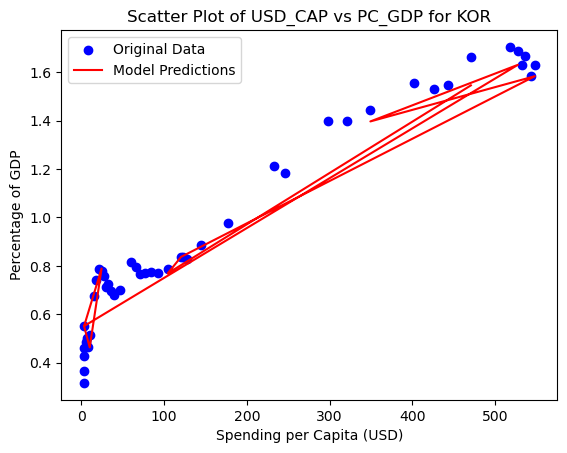

Optimal n_neighbors: 4
The RMSPE for NOR is: 0.0336
R^2 score: 0.9610194060692343


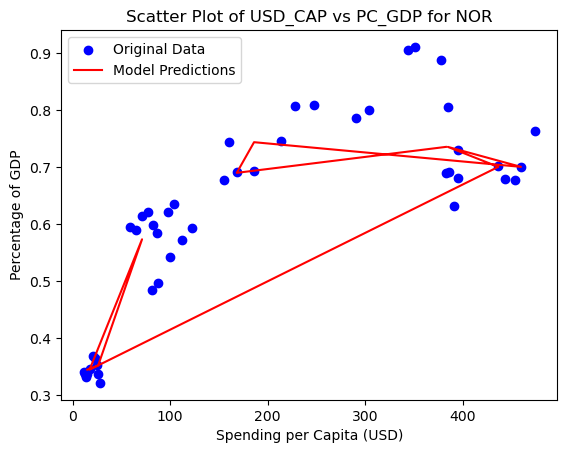

Optimal n_neighbors: 1
The RMSPE for SWE is: 0.0322
R^2 score: 0.9850482527759752


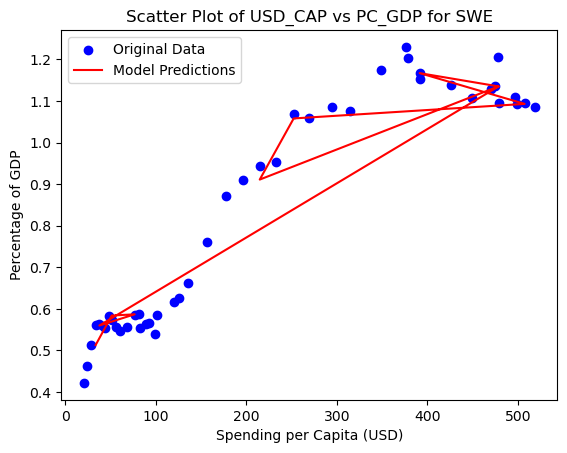

In [17]:
def KNN(country):
    country_name = country.LOCATION.unique()[0]

    # Split the dataset into training and testing sets
    country_train, country_test = train_test_split(country, train_size=0.8, random_state=42)

    # Define the parameter grid for n_neighbors
    param_grid = {'n_neighbors': list(range(1, 21))}

    # Instantiate and fit the KNN model
    knn = KNeighborsRegressor()

   # Perform grid search with cross-validation
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(country_train[['USD_CAP']], country_train['PC_GDP'])

    # Print the cross-validation results
    #print("Cross-validation results:")
    #cv_results = grid_search.cv_results_
    #for mean_score, std_score, params in zip(cv_results["mean_test_score"], cv_results["std_test_score"], cv_results["params"]):
    #    print(f"n_neighbors={params['n_neighbors']} - Mean Score: {mean_score:.4f}, Std Score: {std_score:.4f}")

    # Get the best number of neighbors
    best_n_neighbors = grid_search.best_params_['n_neighbors']
    print(f"Optimal n_neighbors: {best_n_neighbors}")

    # Use the best n_neighbors to fit the model
    knn_best = KNeighborsRegressor(n_neighbors=best_n_neighbors)
    knn_best.fit(country_train[['USD_CAP']], country_train['PC_GDP'])

    # Make predictions
    country_test["predicted"] = knn_best.predict(country_test[["USD_CAP"]])

    # Calculate RMSPE
    RMSPE = mean_squared_error(y_true=country_test['PC_GDP'], y_pred=country_test['predicted'])**0.5
    print(f"The RMSPE for {country_name} is: {RMSPE:.4f}")

    # Calculate R^2 score
    r2 = r2_score(country_test["PC_GDP"], country_test["predicted"])
    print(f"R^2 score: {r2}")

    # Plot the model predictions as a line
    plt.scatter(country['USD_CAP'], country['PC_GDP'], label='Original Data', color='blue')
    plt.plot(country_test['USD_CAP'], country_test['predicted'], color='red', label='Model Predictions')

    # Add labels and legend
    plt.xlabel('Spending per Capita (USD)')
    plt.ylabel('Percentage of GDP')
    plt.title(f'Scatter Plot of USD_CAP vs PC_GDP for {country_name}')
    plt.legend()

    # Show the plot
    plt.show()

# Applying the function to each country in df_all_years
for country_name, country_group in df_all_years1.groupby("LOCATION"):
    KNN(country_group)


PC_HEALTHXP vs PC_GDP

Optimal n_neighbors: 2
The RMSPE for CAN is: 0.6529
R^2 score: 0.9701343767542024


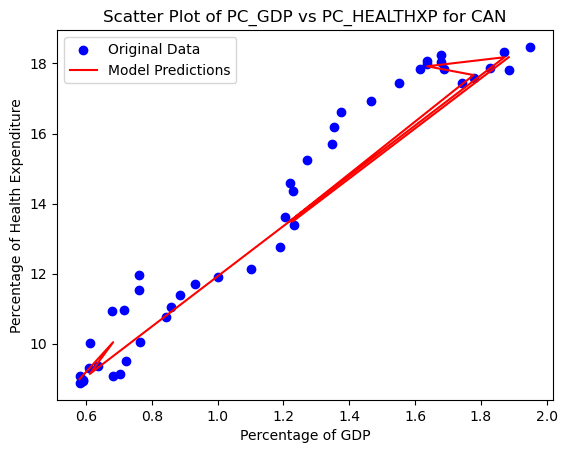

Optimal n_neighbors: 3
The RMSPE for DEU is: 0.5262
R^2 score: 0.14822481656918995


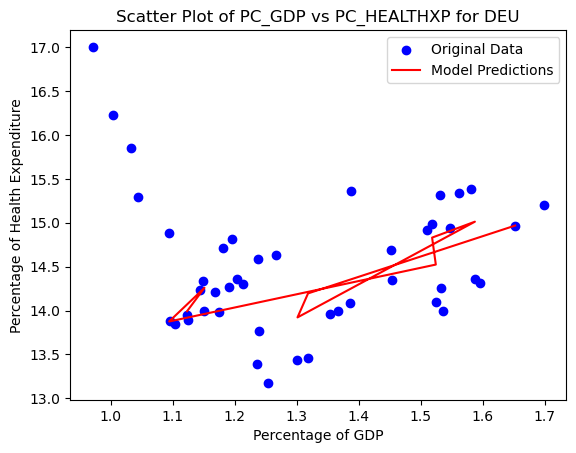

Optimal n_neighbors: 3
The RMSPE for FIN is: 1.3304
R^2 score: 0.1880705866488026


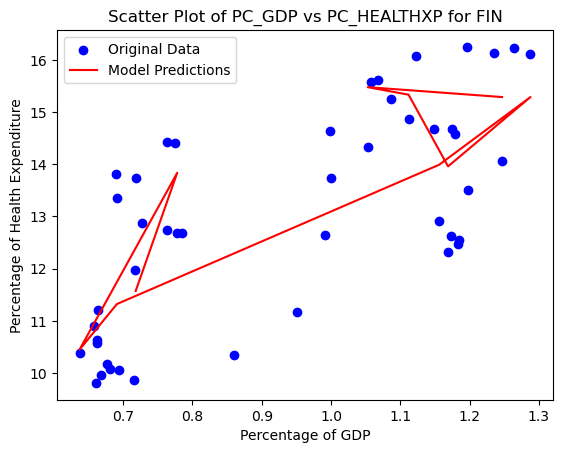

Optimal n_neighbors: 3
The RMSPE for ISL is: 1.5639
R^2 score: -0.8604315938603861


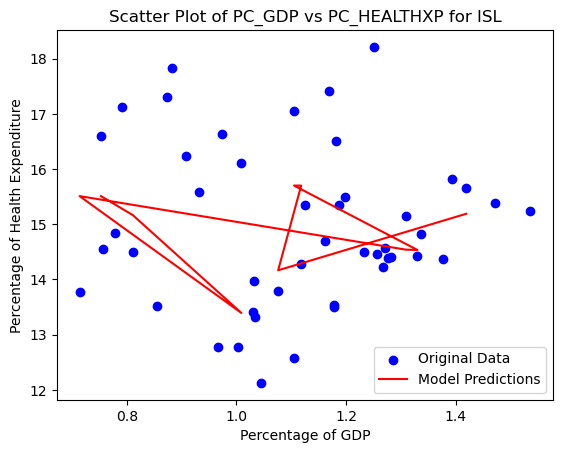

Optimal n_neighbors: 2
The RMSPE for KOR is: 0.8733
R^2 score: 0.86857509258436


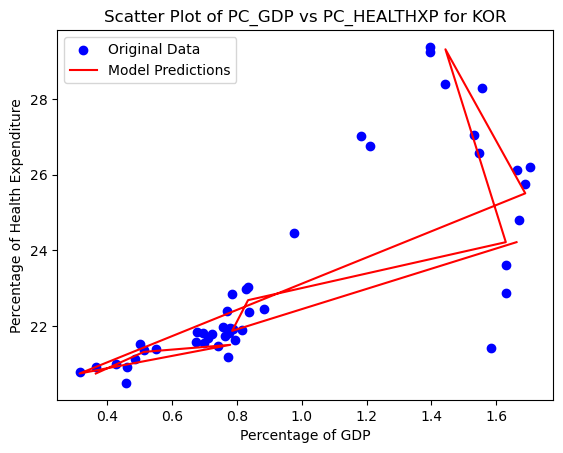

Optimal n_neighbors: 5
The RMSPE for NOR is: 0.8925
R^2 score: 0.6581020765081238


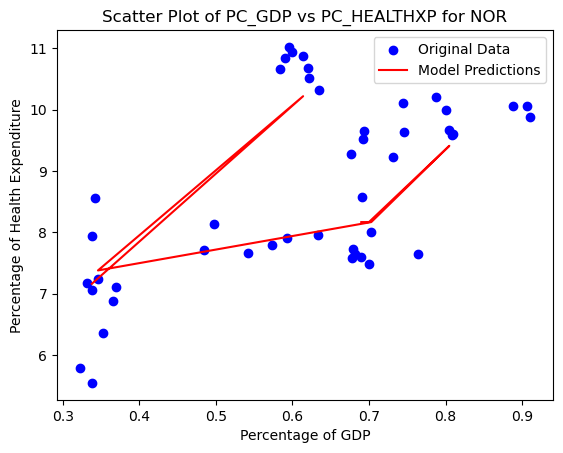

Optimal n_neighbors: 13
The RMSPE for SWE is: 1.6269
R^2 score: 0.581010340642587


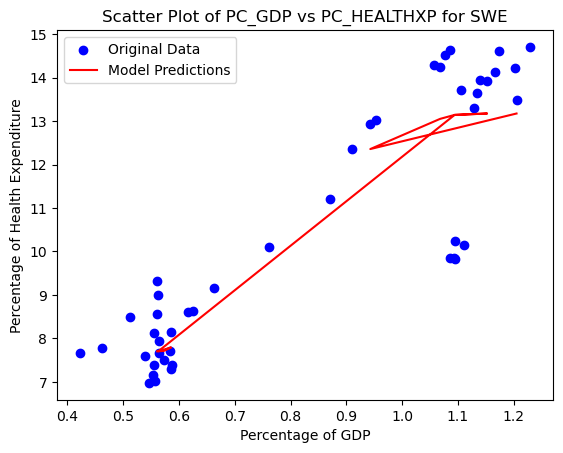

In [18]:
def KNN(country):
    country_name = country.LOCATION.unique()[0]

    # Split the dataset into training and testing sets
    country_train, country_test = train_test_split(country, train_size=0.8, random_state=42)

    # Define the parameter grid for n_neighbors
    param_grid = {'n_neighbors': list(range(1, 21))}

    # Instantiate and fit the KNN model
    knn = KNeighborsRegressor()

   # Perform grid search with cross-validation
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(country_train[['PC_GDP']], country_train['PC_HEALTHXP'])

    # Print the cross-validation results
    #print("Cross-validation results:")
    #cv_results = grid_search.cv_results_
    #for mean_score, std_score, params in zip(cv_results["mean_test_score"], cv_results["std_test_score"], cv_results["params"]):
    #    print(f"n_neighbors={params['n_neighbors']} - Mean Score: {mean_score:.4f}, Std Score: {std_score:.4f}")

    # Get the best number of neighbors
    best_n_neighbors = grid_search.best_params_['n_neighbors']
    print(f"Optimal n_neighbors: {best_n_neighbors}")

    # Use the best n_neighbors to fit the model
    knn_best = KNeighborsRegressor(n_neighbors=best_n_neighbors)
    knn_best.fit(country_train[['PC_GDP']], country_train['PC_HEALTHXP'])

    # Make predictions
    country_test["predicted"] = knn_best.predict(country_test[["PC_GDP"]])

    # Calculate RMSPE
    RMSPE = mean_squared_error(y_true=country_test['PC_HEALTHXP'], y_pred=country_test['predicted'])**0.5
    print(f"The RMSPE for {country_name} is: {RMSPE:.4f}")

    # Calculate R^2 score
    r2 = r2_score(country_test["PC_HEALTHXP"], country_test["predicted"])
    print(f"R^2 score: {r2}")

    # Plot the model predictions as a line
    plt.scatter(country['PC_GDP'], country['PC_HEALTHXP'], label='Original Data', color='blue')
    plt.plot(country_test['PC_GDP'], country_test['predicted'], color='red', label='Model Predictions')

    # Add labels and legend
    plt.xlabel('Percentage of GDP')
    plt.ylabel('Percentage of Health Expenditure')
    plt.title(f'Scatter Plot of PC_GDP vs PC_HEALTHXP for {country_name}')
    plt.legend()

    # Show the plot
    plt.show()

# Applying the function to each country in df_all_years
for country_name, country_group in df_all_years1.groupby("LOCATION"):
    KNN(country_group)
